In [3]:
import sys
sys.path.append('../src')

from models.SwinV2Model.train_cv import train_cv as train_SwinV2Model
from models.SwinV2Model.predict import predict as predict_SwinV2Model

from utils.show_graph import plot_history

In [2]:
package_model_path, loss_history, auc_history = train_SwinV2Model(
    num_epochs=20,
    learning_rate=1e-05,
    batch_size=1,
    n_splits=5,
)

[DEBUG] 2023-09-07 23:33:55 - Fold: 1/5
[DEBUG] 2023-09-07 23:33:55 - --------------------


c:\Users\negi\Documents\GitHub\tkser\technopro-food-package\.venv\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[DEBUG] 2023-09-07 23:33:57 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-07 23:33:57 - Starting training on cuda at 2023-09-07 23:33:57
[DEBUG] 2023-09-07 23:33:57 - Model parameters:
[DEBUG] 2023-09-07 23:33:57 - patch_embed.proj.weight: torch.Size([192, 3, 4, 4])
[DEBUG] 2023-09-07 23:33:57 - patch_embed.proj.bias: torch.Size([192])
[DEBUG] 2023-09-07 23:33:57 - patch_embed.norm.weight: torch.Size([192])
[DEBUG] 2023-09-07 23:33:57 - patch_embed.norm.bias: torch.Size([192])
[DEBUG] 2023-09-07 23:33:57 - layers.0.blocks.0.attn.logit_scale: torch.Size([6, 1, 1])
[DEBUG] 2023-09-07 23:33:57 - layers.0.blocks.0.attn.q_bia

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [4]:
best_auc_model_paths = [
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230907233357_epoch_13_auc_0.9851.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230908014813_epoch_19_auc_0.9908.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230908040332_epoch_20_auc_0.9838.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230908061916_epoch_12_auc_0.9838.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230908083508_epoch_15_auc_0.9872.pth"
]

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_SwinV2Model(
      model_path=best_auc_model_path,
      batch_size=1,
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_swintransformerv2_5fold_auc_0.98614.csv', index=False, header=False)

[DEBUG] 2023-09-08 12:01:19 - Starting prediction on cuda
Prediction: 100%|██████████| 2180/2180 [02:30<00:00, 14.49it/s]
[DEBUG] 2023-09-08 12:03:50 - Finished prediction
[DEBUG] 2023-09-08 12:03:52 - Starting prediction on cuda
Prediction: 100%|██████████| 2180/2180 [02:28<00:00, 14.71it/s]
[DEBUG] 2023-09-08 12:06:21 - Finished prediction
[DEBUG] 2023-09-08 12:06:23 - Starting prediction on cuda
Prediction: 100%|██████████| 2180/2180 [02:26<00:00, 14.87it/s]
[DEBUG] 2023-09-08 12:08:50 - Finished prediction
[DEBUG] 2023-09-08 12:08:52 - Starting prediction on cuda
Prediction: 100%|██████████| 2180/2180 [02:26<00:00, 14.88it/s]
[DEBUG] 2023-09-08 12:11:18 - Finished prediction
[DEBUG] 2023-09-08 12:11:20 - Starting prediction on cuda
Prediction: 100%|██████████| 2180/2180 [02:27<00:00, 14.83it/s]
[DEBUG] 2023-09-08 12:13:47 - Finished prediction


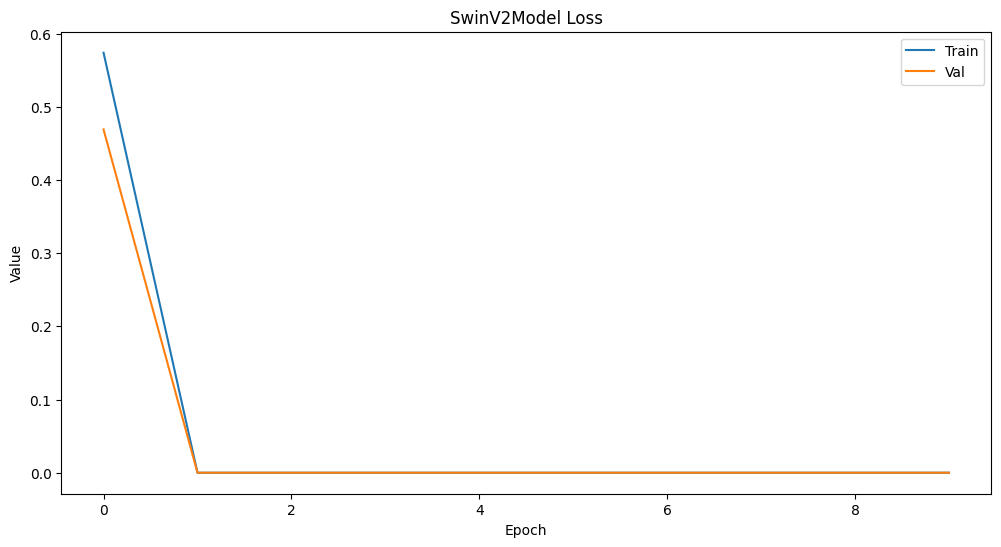

In [ ]:
plot_history(loss_history, "SwinV2Model Loss Avg. 5-Fold CV")

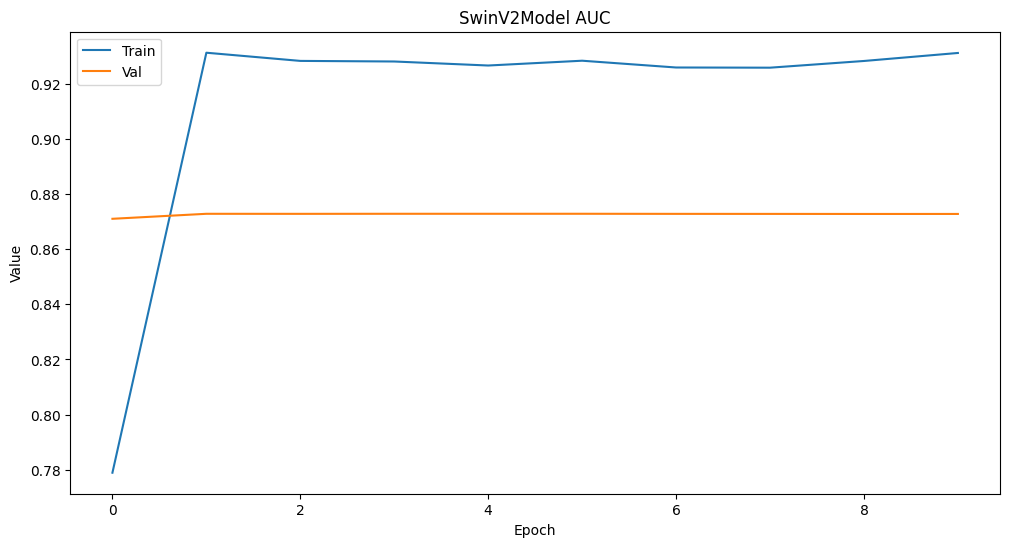

In [ ]:
plot_history(auc_history, "SwinV2Model AUC Avg. 5-Fold CV")